## Predictions: Regression for car mileage adn diamond price.

In [1]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# the data set is available at the url below.
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/mpg.csv"

# using the read_csv function in the pandas library, we load the data into a dataframe.

df = pd.read_csv(URL)

In [4]:
df.head()

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
0,15.0,8,390.0,190,3850,8.5,70,American
1,21.0,6,199.0,90,2648,15.0,70,American
2,18.0,6,199.0,97,2774,15.5,70,American
3,16.0,8,304.0,150,3433,12.0,70,American
4,14.0,8,455.0,225,3086,10.0,70,American


In [5]:
df.describe()

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MPG          392 non-null    float64
 1   Cylinders    392 non-null    int64  
 2   Engine Disp  392 non-null    float64
 3   Horsepower   392 non-null    int64  
 4   Weight       392 non-null    int64  
 5   Accelerate   392 non-null    float64
 6   Year         392 non-null    int64  
 7   Origin       392 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 24.6+ KB


In [7]:
df.sample()

,MPG,Cylinders,Engine Disp,Horsepower,Weight,Accelerate,Year,Origin
357,32.3,4,97.0,67,2065,17.8,81,Japanese


In [8]:
df.shape

(392, 8)

<Axes: xlabel='Horsepower', ylabel='MPG'>

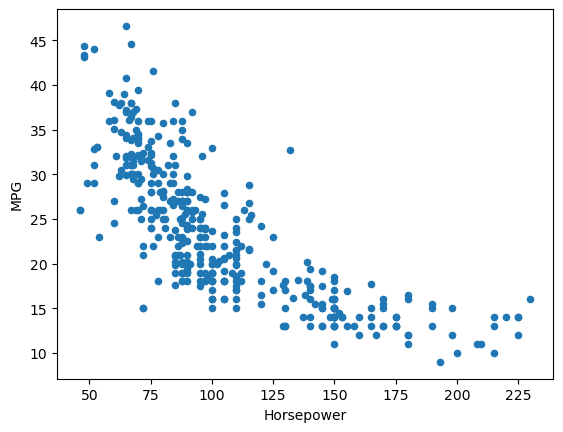

In [9]:
df.plot.scatter(x='Horsepower', y='MPG')

## Identify the target column and the data columns

In [11]:
target = df["MPG"]

In [13]:
features = df[["Horsepower","Weight"]]

### Build and train a linear regression model

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(features, target)

LinearRegression()

In [16]:
lr.predict([[100, 2000]])

array([29.3216098])

-  29.3216098 miles per gallon is the mileage of a car with HorsePower = 100 and Weight = 2000

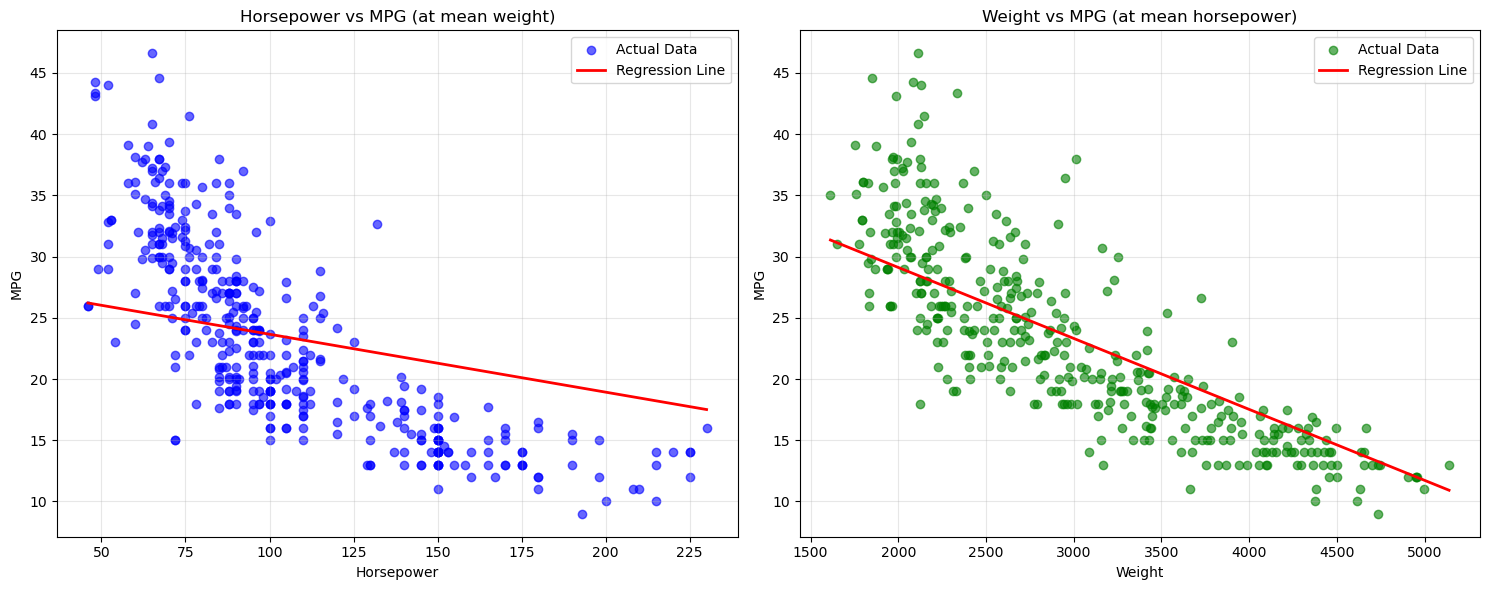

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Horsepower vs MPG
ax1.scatter(df['Horsepower'], df['MPG'], alpha=0.6, color='blue', label='Actual Data')
horsepower_range = np.linspace(df['Horsepower'].min(), df['Horsepower'].max(), 100)
# For visualization, we'll use mean weight
mean_weight = df['Weight'].mean()
predicted_mpg = lr.predict([[hp, mean_weight] for hp in horsepower_range])
ax1.plot(horsepower_range, predicted_mpg, color='red', linewidth=2, label='Regression Line')
ax1.set_xlabel('Horsepower')
ax1.set_ylabel('MPG')
ax1.set_title('Horsepower vs MPG (at mean weight)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Weight vs MPG
ax2.scatter(df['Weight'], df['MPG'], alpha=0.6, color='green', label='Actual Data')
weight_range = np.linspace(df['Weight'].min(), df['Weight'].max(), 100)
# For visualization, we'll use mean horsepower
mean_horsepower = df['Horsepower'].mean()
predicted_mpg_weight = lr.predict([[mean_horsepower, w] for w in weight_range])
ax2.plot(weight_range, predicted_mpg_weight, color='red', linewidth=2, label='Regression Line')
ax2.set_xlabel('Weight')
ax2.set_ylabel('MPG')
ax2.set_title('Weight vs MPG (at mean horsepower)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

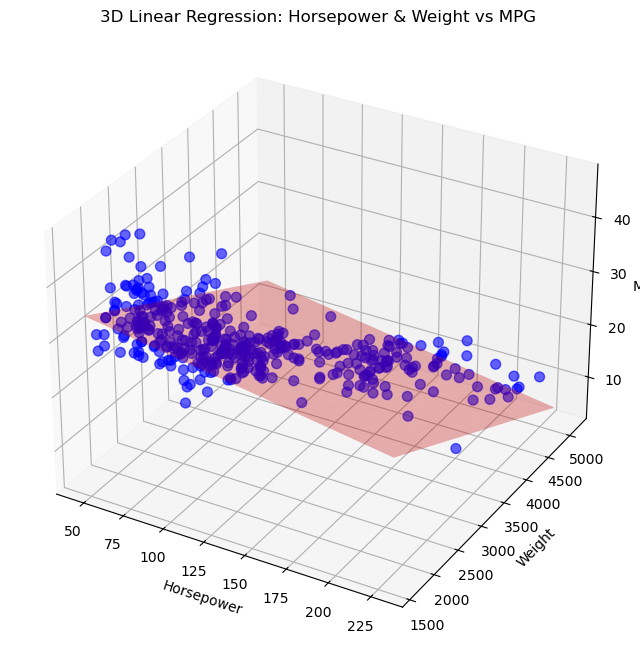

In [20]:
# 3D Plot showing both features
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data
ax.scatter(df['Horsepower'], df['Weight'], df['MPG'], alpha=0.6, c='blue', s=50, label='Actual Data')

# Create a mesh for the regression plane
horsepower_mesh = np.linspace(df['Horsepower'].min(), df['Horsepower'].max(), 20)
weight_mesh = np.linspace(df['Weight'].min(), df['Weight'].max(), 20)
hp_grid, weight_grid = np.meshgrid(horsepower_mesh, weight_mesh)

# Predict MPG for the mesh
mesh_points = np.column_stack([hp_grid.ravel(), weight_grid.ravel()])
mpg_pred = lr.predict(mesh_points)
mpg_grid = mpg_pred.reshape(hp_grid.shape)

# Plot the regression plane
ax.plot_surface(hp_grid, weight_grid, mpg_grid, alpha=0.3, color='red', label='Regression Plane')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Linear Regression: Horsepower & Weight vs MPG')
plt.show()

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Make predictions on the training data
y_pred = lr.predict(features)

# Calculate metrics
r2 = r2_score(target, y_pred)
mse = mean_squared_error(target, y_pred)
mae = mean_absolute_error(target, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Display model coefficients
print(f"\nModel Coefficients:")
print(f"Horsepower coefficient: {lr.coef_[0]:.4f}")
print(f"Weight coefficient: {lr.coef_[1]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")

Model Performance Metrics:
R² Score: 0.7064
Mean Squared Error: 17.8414
Root Mean Squared Error: 4.2239
Mean Absolute Error: 3.2358

Model Coefficients:
Horsepower coefficient: -0.0473
Weight coefficient: -0.0058
Intercept: 45.6402


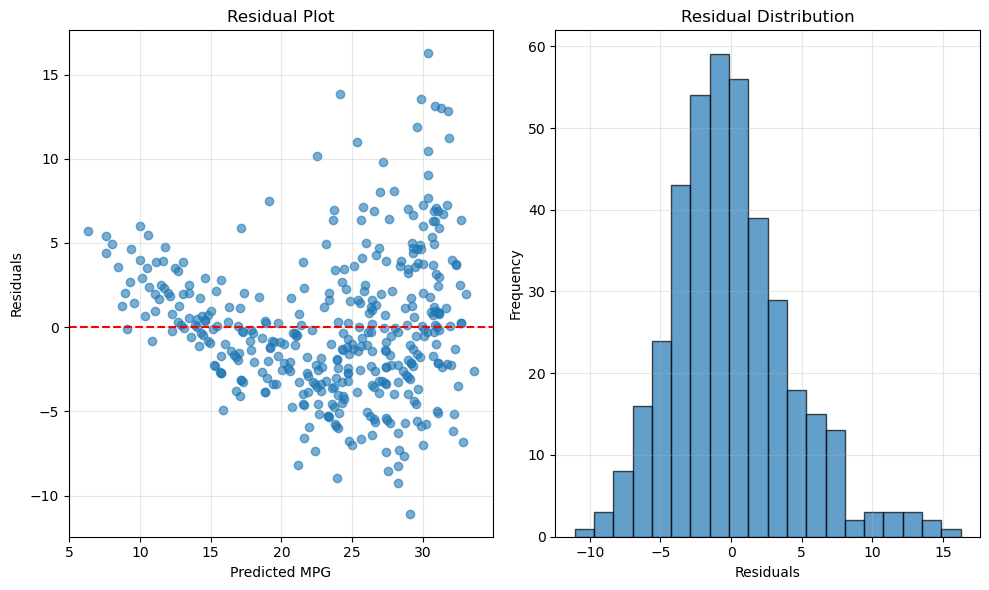

In [22]:
# Residual plot to check model assumptions
plt.figure(figsize=(10, 6))
residuals = target - y_pred

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-BD0231EN-SkillsNetwork/datasets/diamonds.csv"

df_diamond = pd.read_csv(URL2)

In [23]:
df_diamond.head()

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [25]:
target_diamond = df_diamond["price"]

In [26]:
features_diamond = df_diamond[["carat","depth"]]

In [29]:
lr2 = LinearRegression()
lr2.fit(features_diamond, target_diamond)

LinearRegression()

In [30]:
lr2.score(features_diamond, target_diamond)

0.8506754571636563

In [31]:
lr2.predict([[0.3, 60]])

array([244.95605225])